<a href="https://colab.research.google.com/github/cavemansblog/googlecolabrepo/blob/main/Module8_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [ ]:
from transformers import pipeline

# Load sentiment-analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that aut

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ecommerce_product_reviews.csv to ecommerce_product_reviews.csv


In [ ]:
import pandas as pd

# Load the CSV file
reviews_df = pd.read_csv('ecommerce_product_reviews.csv')

In [ ]:
# Analyze sentiment of each review
reviews_df['sentiment'] = reviews_df['review_text'].apply(lambda x: sentiment_pipeline(x)[0]['label'])


In [ ]:
# Map sentiments to scores (example: positive = 1, neutral = 0.5, negative = 0)
sentiment_to_score = {'POSITIVE': 1, 'NEGATIVE': 0, 'NEUTRAL': 0.5}
reviews_df['sentiment_score'] = reviews_df['sentiment'].map(sentiment_to_score)

# Calculate CSAT
csat = reviews_df['sentiment_score'].mean()
print(f'Customer Satisfaction Score (CSAT): {csat}')


Customer Satisfaction Score (CSAT): 0.6001166666666666


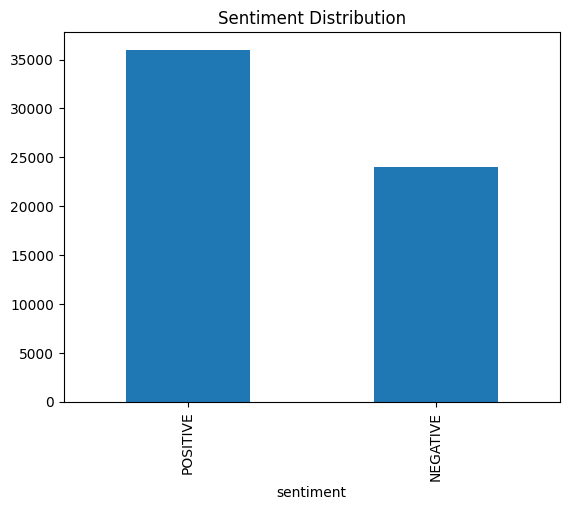

In [ ]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
sentiment_counts = reviews_df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', title='Sentiment Distribution')
plt.show()

# Plot CSAT over time (if you have a date column)
if 'review_date' in reviews_df.columns:
    reviews_df['review_date'] = pd.to_datetime(reviews_df['review_date'])
    csat_over_time = reviews_df.resample('M', on='review_date')['sentiment_score'].mean()
    csat_over_time.plot(title='CSAT Over Time')
    plt.show()
